In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv(r"E:\Data Science\Atomcamp\python\Portfolio Project\flights.csv")
df

C:\Users\DELL\AppData\Local\Temp\ipykernel_15952\3292182275.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv(r"E:\Data Science\Atomcamp\python\Portfolio Project\flights.csv")


,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,AS,98,N407AS,ANC,SEA,5,...,408.0,-22.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,AA,2336,N3KUAA,LAX,PBI,10,...,741.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2,2015,1,1,4,US,840,N171US,SFO,CLT,20,...,811.0,5.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,AA,258,N3HYAA,LAX,MIA,20,...,756.0,-9.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,2015,1,1,4,AS,135,N527AS,SEA,ANC,25,...,259.0,-21.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5819074,2015,12,31,4,B6,688,N657JB,LAX,BOS,2359,...,753.0,-26.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819075,2015,12,31,4,B6,745,N828JB,JFK,PSE,2359,...,430.0,-16.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819076,2015,12,31,4,B6,1503,N913JB,JFK,SJU,2359,...,432.0,-8.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
5819077,2015,12,31,4,B6,333,N527JB,MCO,SJU,2359,...,330.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [6]:
df.isnull().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
TAIL_NUMBER              14721
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME           86153
DEPARTURE_DELAY          86153
TAXI_OUT                 89047
WHEELS_OFF               89047
SCHEDULED_TIME               6
ELAPSED_TIME            105071
AIR_TIME                105071
DISTANCE                     0
WHEELS_ON                92513
TAXI_IN                  92513
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME             92513
ARRIVAL_DELAY           105071
DIVERTED                     0
CANCELLED                    0
CANCELLATION_REASON    5729195
AIR_SYSTEM_DELAY       4755640
SECURITY_DELAY         4755640
AIRLINE_DELAY          4755640
LATE_AIRCRAFT_DELAY    4755640
WEATHER_DELAY          4755640
dtype: int64

In [5]:
df.duplicated().sum()

0


Question: Which airline had the highest percentage of delayed or cancelled flights in 2015?


In [35]:
# Filter data for the year 2015
data_2015 = df[df['YEAR'] == 2015]

# Calculate the total number of delayed or cancelled flights for each airline
delayed_or_cancelled_flights = data_2015.groupby('AIRLINE')['CANCELLED'].sum() + (data_2015['ARRIVAL_DELAY'] > 0).groupby(data_2015['AIRLINE']).sum()

# Calculate the total number of flights operated by each airline
total_flights = data_2015.groupby('AIRLINE').size()

# Calculate the percentage of delayed or cancelled flights for each airline
percentage_delayed_or_cancelled = (delayed_or_cancelled_flights / total_flights) * 100

# Identify the airline with the highest percentage
highest_percentage_airline = percentage_delayed_or_cancelled.idxmax()
highest_percentage_value = percentage_delayed_or_cancelled.max()

print("Airline with the highest percentage of delayed or cancelled flights in 2015:", highest_percentage_airline)
print("Percentage of delayed or cancelled flights:", highest_percentage_value)


Airline with the highest percentage of delayed or cancelled flights in 2015: NK
Percentage of delayed or cancelled flights: 50.171666141302964


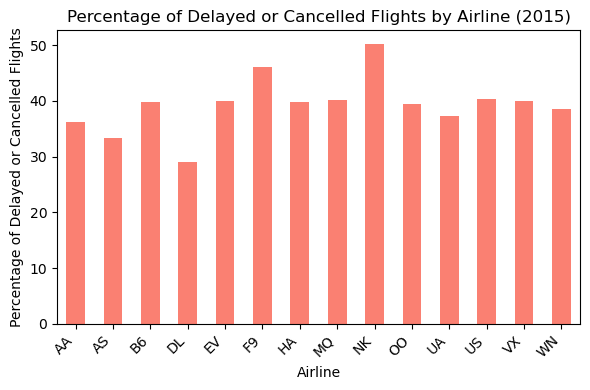

In [47]:
plt.figure(figsize=(6, 4))
percentage_delayed_or_cancelled.plot(kind='bar', color='salmon')
plt.xlabel('Airline')
plt.ylabel('Percentage of Delayed or Cancelled Flights')
plt.title('Percentage of Delayed or Cancelled Flights by Airline (2015)')
plt.xticks(rotation=45, ha='right')  # Rotate airline labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Which airports had the most flight cancellations?

In [6]:
df.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [7]:
# filter data to view cancel flight 
cancel_flight=df[df["CANCELLED"]==1]
cancel_flight

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,...,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
32,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
42,2015,1,1,4,AA,2459,N3BDAA,PHX,DFW,200,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
68,2015,1,1,4,OO,5254,N746SK,MAF,IAH,510,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
82,2015,1,1,4,MQ,2859,N660MQ,SGF,DFW,525,...,NaN,NaN,0,1,B,NaN,NaN,NaN,NaN,NaN
90,2015,1,1,4,OO,5460,N583SW,RDD,SFO,530,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5818090,2015,12,31,4,UA,1789,NaN,IAH,TPA,1955,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818157,2015,12,31,4,UA,222,NaN,SFO,LAX,2000,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818318,2015,12,31,4,AA,2245,N880AA,MIA,SAN,2019,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5818777,2015,12,31,4,NK,416,N522NK,FLL,IAG,2155,...,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN


In [9]:
#count the number of cancelled flights for each airport and groupby origin_airport
cancel_flight_airport=cancel_flight.groupby('ORIGIN_AIRPORT').size()
cancel_flight_airport

ORIGIN_AIRPORT
10136      7
10140      6
10141      1
10155      5
10157      3
        ... 
VPS       99
WRG       11
XNA      296
YAK        5
YUM       23
Length: 609, dtype: int64

In [11]:
sort_flight=cancel_flight_airport.sort_values(ascending=False)
sort_flight

ORIGIN_AIRPORT
ORD      8548
DFW      6254
LGA      4531
EWR      3110
BOS      2654
         ... 
12982       1
13076       1
12339       1
12278       1
12896       1
Length: 609, dtype: int64

In [12]:
sort_flight.head(5)

ORIGIN_AIRPORT
ORD    8548
DFW    6254
LGA    4531
EWR    3110
BOS    2654
dtype: int64

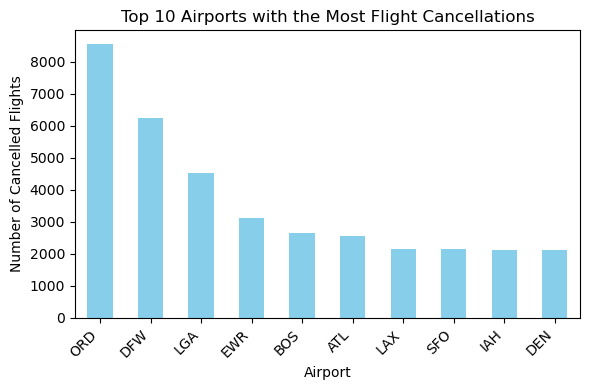

In [15]:
import matplotlib.pyplot as plt

# Plotting
plt.figure(figsize=(6, 4))
sort_flight.head(10).plot(kind='bar', color='skyblue')
plt.xlabel('Airport')
plt.ylabel('Number of Cancelled Flights')
plt.title('Top 10 Airports with the Most Flight Cancellations')
plt.xticks(rotation=45, ha='right')  # Rotate airport labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


Are there any geographical patterns in flight delays? Do certain regions or airports experience more delays than others?

In [28]:
#Group data by origin airport and calculate delay metrics
origin_airport_delays = df.groupby('ORIGIN_AIRPORT').agg({
    'DEPARTURE_DELAY': 'mean',
    'ARRIVAL_DELAY': 'mean',
    'CANCELLED': 'sum'
}).reset_index()

In [29]:
origin_airport_delays

,ORIGIN_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,CANCELLED
0,10135,10.075221,7.601770,0
1,10136,3.368132,-6.513812,7
2,10140,5.682484,0.320799,6
3,10141,1.803030,0.606061,1
4,10146,9.500000,11.987654,0
...,...,...,...,...
925,WRG,3.091884,4.667180,11
926,WYS,1.375000,-1.865385,0
927,XNA,11.886184,11.233850,296
928,YAK,-6.292237,-5.632308,5


In [31]:
#Group data by destination airport and calculate delay metrics
destination_airport_delays = df.groupby('DESTINATION_AIRPORT').agg({
    'DEPARTURE_DELAY': 'mean',
    'ARRIVAL_DELAY': 'mean',
    'CANCELLED': 'sum'
}).reset_index()

In [32]:
destination_airport_delays

,DESTINATION_AIRPORT,DEPARTURE_DELAY,ARRIVAL_DELAY,CANCELLED
0,10135,4.424779,1.834821,1
1,10136,3.951087,-0.322404,7
2,10140,5.695958,1.339977,3
3,10141,4.402985,-1.626866,0
4,10146,8.439024,8.219512,0
...,...,...,...,...
925,WRG,5.732116,5.375767,7
926,WYS,-1.875000,4.193237,0
927,XNA,11.397254,8.772090,265
928,YAK,-1.134763,0.371166,9


In simpler terms, this code calculates the average departure delay, average arrival delay, and total number of cancelled flights for both origin and destination airports. It organizes this information into two separate datasets, one for origin airports and another for destination airports, making it easier to analyze and compare delays between different airports.

Text(0.5, 1.0, 'Top 10 Airports by Average Departure Delay')

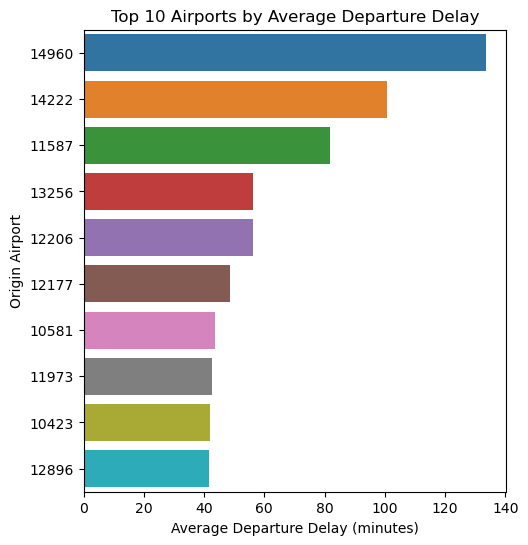

In [33]:
plt.figure(figsize=(12, 6))

# Plot average departure delay by origin airport
plt.subplot(1, 2, 1)
sns.barplot(x='DEPARTURE_DELAY', y='ORIGIN_AIRPORT', data=origin_airport_delays.sort_values(by='DEPARTURE_DELAY', ascending=False).head(10))
plt.xlabel('Average Departure Delay (minutes)')
plt.ylabel('Origin Airport')
plt.title('Top 10 Airports by Average Departure Delay')

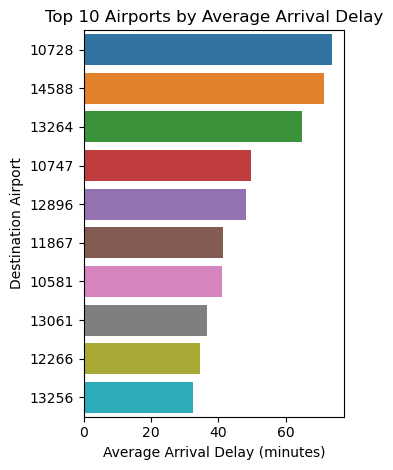

In [34]:
# Plot average arrival delay by destination airport
plt.subplot(1, 2, 2)
sns.barplot(x='ARRIVAL_DELAY', y='DESTINATION_AIRPORT', data=destination_airport_delays.sort_values(by='ARRIVAL_DELAY', ascending=False).head(10))
plt.xlabel('Average Arrival Delay (minutes)')
plt.ylabel('Destination Airport')
plt.title('Top 10 Airports by Average Arrival Delay')

plt.tight_layout()
plt.show()

## What was the average flight delay for each day of the week? Are weekends or weekdays more prone to delays what does it mean

This question aims to analyze flight delay patterns based on the day of the week. Here's a breakdown of what it means:

Average Flight Delay for Each Day of the Week:
This part of the question asks to calculate the average delay time for flights on each day of the week (Monday, Tuesday, Wednesday, etc.).
Weekends vs. Weekdays:
The question also seeks to compare flight delays between weekends (Saturday and Sunday) and weekdays (Monday through Friday).
By comparing the average delay times for weekends and weekdays, we can determine if there's a difference in delay patterns between these time periods.

In [37]:
# Group data by day of the week and calculate average arrival delay
average_delay_by_day = df.groupby('DAY_OF_WEEK')['ARRIVAL_DELAY'].mean()

# Separate data into weekends and weekdays
weekends = average_delay_by_day.loc[[6, 7]]  # 6 represents Saturday, 7 represents Sunday
weekdays = average_delay_by_day.drop([6, 7])  # Drop Saturday and Sunday from weekdays


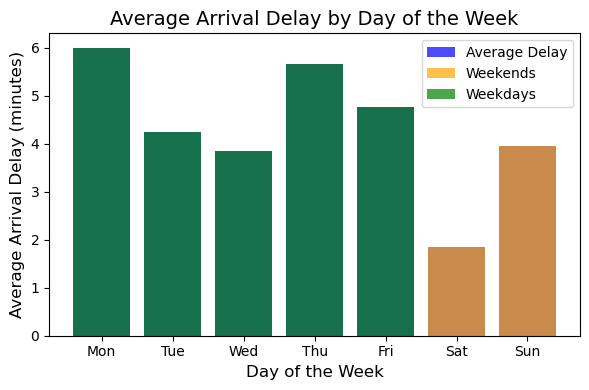

In [38]:
plt.figure(figsize=(6, 4))

# Plot average delay for each day of the week
plt.bar(average_delay_by_day.index, average_delay_by_day.values, color='blue', alpha=0.7, label='Average Delay')

# Highlight weekends and weekdays
plt.bar(weekends.index, weekends.values, color='orange', alpha=0.7, label='Weekends')
plt.bar(weekdays.index, weekdays.values, color='green', alpha=0.7, label='Weekdays')

# Add labels and title
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Average Arrival Delay (minutes)', fontsize=12)
plt.title('Average Arrival Delay by Day of the Week', fontsize=14)
plt.xticks(range(1, 8), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()